<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# HW: Stochastics

### due YYYY-MM-DD ###

HW submission by group (up to 4 people)
* John Doe <johndoe@illinois.edu>
* Jane Roe <janeroe@illinois.edu>

Note:  Anaconda Python <https://www.anaconda.com/distribution/> is a strong implementation of python.

## imports and graphics configurations

In [ ]:
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
import copy

In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

# **Technology** #

**Technology:** Compute $\cos(k\pi/10)$ for $k\in \{0,1,2,\dots 20\}$


# **Pairs Trading** #

**Cointegration:** Is it better to regress F on GM, or GM on F?  This is an open-ended question with no fixed correct answer. I want you to investigate, come to a conclusion, and defend it.

# **Gaussian Random Variables** #

**Gaussian Moments:** Let $\eta$ be a standard Gaussian random variable.  By simulation, compute 
* $\mathbb{E}\left[\exp\left[\tfrac16\eta\right]\right]$
* $\mathbb{E}[\eta^4]$

# **Brownian Motion** #

**Scaled Random Walk** Let $S$ be a simple random walk (up or down by 1 with probability 0.5).
Empirically compute the distribution of
* $S_{50}/\sqrt{10}$
* $S_{100}/\sqrt{20}$
* $S_{250}/\sqrt{50}$

CPU times: user 234 ms, sys: 73.4 ms, total: 307 ms
Wall time: 492 ms


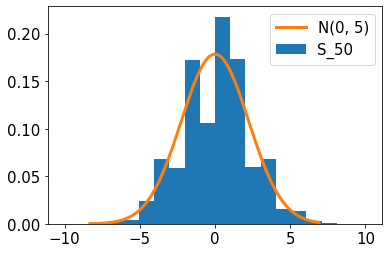

In [ ]:
%%time
rvs = numpy.random.choice([-1,1], (500000, 50))
rvs[0,:] = 0
rvs = numpy.sum(rvs, axis=1) / numpy.sqrt(10)
μ, σ = 0, numpy.sqrt(5)
var=5
x = numpy.linspace(scipy.stats.norm.ppf(0.0001, μ, σ),
                scipy.stats.norm.ppf(0.999, μ, σ), 1000)
pdf = scipy.stats.norm.pdf(x, μ, σ)
plt.hist(rvs,bins=20, density=True, label='S_50')
plt.plot(x,pdf, lw=3, label='N(0, {var:.0f})'.format(var=var))
plt.legend()

CPU times: user 398 ms, sys: 125 ms, total: 523 ms
Wall time: 740 ms


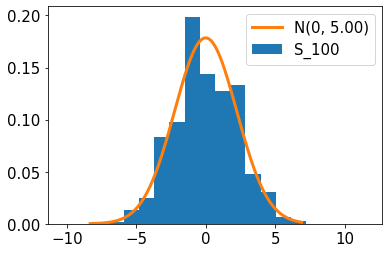

In [ ]:
%%time
rvs = numpy.random.choice([-1,1], (500000, 100))
rvs[0,:] = 0
rvs = rvs.sum(axis=1) / numpy.sqrt(20)
μ, σ = 0, numpy.sqrt(5)
var=5
x = numpy.linspace(scipy.stats.norm.ppf(0.0001, μ, σ),
                scipy.stats.norm.ppf(0.999, μ, σ), 1000)
pdf = scipy.stats.norm.pdf(x, μ, σ)
plt.hist(rvs, bins=20, density=True, label='S_100')
plt.plot(x, pdf, lw=3, label='N(0, {var:.2f})'.format(var=5))
plt.legend()

CPU times: user 958 ms, sys: 292 ms, total: 1.25 s
Wall time: 2 s


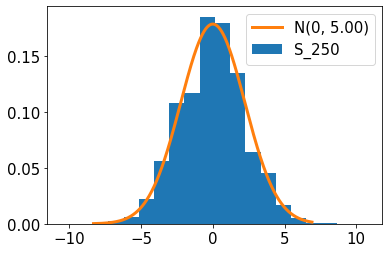

In [ ]:
%%time
rvs = numpy.random.choice([-1,1], (500000, 250))
rvs[0,:] = 0
rvs = rvs.sum(axis=1) / numpy.sqrt(50)
μ, σ = 0, numpy.sqrt(5)
x = numpy.linspace(scipy.stats.norm.ppf(0.0001, μ, σ),
                scipy.stats.norm.ppf(0.999, μ, σ), 1000)
pdf = scipy.stats.norm.pdf(x, μ, σ)
plt.hist(rvs, bins=20, density=True, label='S_250')
plt.plot(x, pdf, lw=3, label='N(0, {var:.2f})'.format(var=var))
plt.legend()

**Brownian Area:**  Let $W$ be a Brownian motion starting at 1 and define
$$ \tau = \inf\{t>0: W_t<0\}$$
Compute the density of
$$ A = \int_{s=0}^{\tau}W_sds$$

In [ ]:
#important W_0 = 1
# W_t < 0 = W_t - W_0 = W_t - 1 < 0 => W_t < 1
threshold=1
N_samples=10000
SEED=2048
T=1
delta=1E-4
tvals=numpy.arange(0,T,step=delta)
dRW=2*scipy.stats.bernoulli.rvs(0.5,size=(len(tvals),N_samples),random_state=SEED)-1
dS=dRW * numpy.sqrt(delta)
dS[0,:]=1 #force RW to start at zero
#dS=pandas.DataFrame(dRW,index=tvals)*numpy.sqrt(delta)
S=numpy.cumsum(dS,axis=0)


In [ ]:
S[:,0]

array([1.  , 1.01, 1.  , ..., 1.41, 1.4 , 1.41])

In [ ]:
passage_ind = numpy.argmax(S <= 0, axis=0)
T_horizon = 1
passage_time = passage_ind[passage_ind > 0] * 1e-4

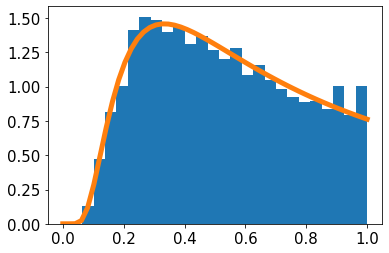

In [ ]:
# plot passage time
plt.hist(passage_time, bins=25, density=True)
xvals=numpy.linspace(0,T_horizon)
fvals=scipy.stats.levy.pdf(xvals,scale=threshold**2)/scipy.stats.levy.cdf(T_horizon,scale=threshold**2)
plt.plot(xvals, fvals)

In [ ]:
S_ = copy.deepcopy(S)
# we have to drop the rest of value when the path is reach 0
for (idx,val) in enumerate(passage_ind):
  if val > 0:
    S_[val+1:, idx] = 0

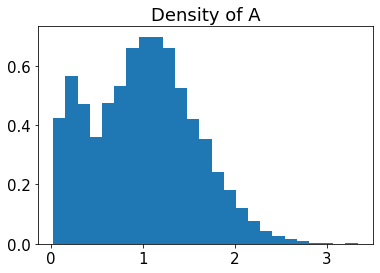

In [ ]:
plt.hist(numpy.sum(S_, axis=0) * 1e-4, bins=25, density=True)
title="Density of A"
plt.title(title);

In [ ]:
import copy
satisfied = copy.deepcopy(S[:, passage_ind > 0])
for (idx,val) in enumerate(passage_ind[passage_ind > 0]):
  satisfied[val+1:,idx] = 0

In [ ]:
#plt.hist(numpy.sum(satisfied, axis=0) * 1e-4, bins=25)